In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Admission_Predict_Ver1.1.csv to Admission_Predict_Ver1.1.csv


In [5]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [6]:
# Drop the 'Serial No.' column
data = data.drop(columns=['Serial No.'])

In [7]:
# Separate features and target
X = data.drop(columns=['Chance of Admit '])
y = data['Chance of Admit ']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))  # For regression, we use a linear activation in the output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [12]:
# Train the Model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2400 - mean_absolute_error: 0.4100 - val_loss: 0.0453 - val_mean_absolute_error: 0.1718
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0314 - mean_absolute_error: 0.1444 - val_loss: 0.0368 - val_mean_absolute_error: 0.1505
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0188 - mean_absolute_error: 0.1130 - val_loss: 0.0226 - val_mean_absolute_error: 0.1148
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0119 - mean_absolute_error: 0.0876 - val_loss: 0.0166 - val_mean_absolute_error: 0.0964
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0086 - mean_absolute_error: 0.0743 - val_loss: 0.0135 - val_mean_absolute_error: 0.0882
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0070 - mean_absolute_error: 0.0665 - val_loss: 0.0114 - val_mean_absolute_error: 0.0811
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0065 - mean_absolute_error: 0.0635 - val_los

In [13]:
# Evaluate the Model
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step


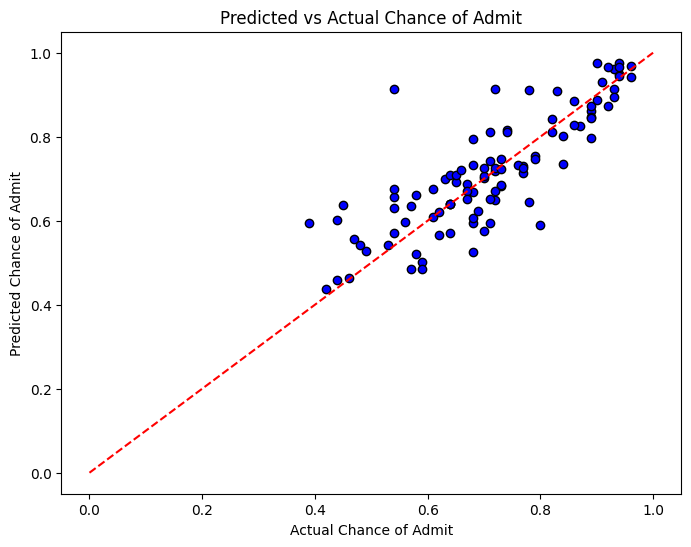

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Predicted Chance of Admit")
plt.title("Predicted vs Actual Chance of Admit")
plt.show()

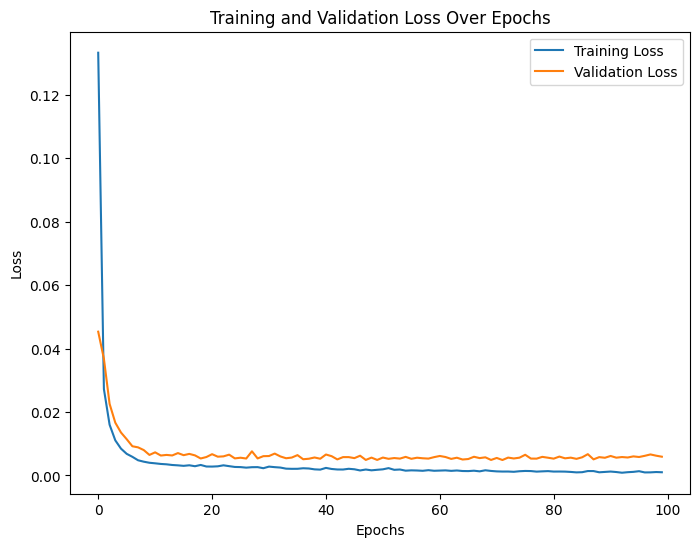

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.show()